# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload the data
user_engagement = pd.read_csv('../Springboard/relax_challenge/takehome_user_engagement.csv', parse_dates= ['time_stamp'])
users = pd.read_csv('../Springboard/relax_challenge/takehome_users.csv', encoding='latin-1', parse_dates= ['creation_time'])

# Explore and clean the data

In [3]:
print(len(user_engagement))
print(user_engagement.nunique())
print(user_engagement.dtypes)
user_engagement.head()

207917
time_stamp    207220
user_id         8823
visited            1
dtype: int64
time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
print(len(users))
print(users.dtypes)
users.head()

12000
object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'],unit='s')
print(users.dtypes)

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object


In [6]:
print(users.isna().sum())
print(user_engagement.isna().sum())

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64
time_stamp    0
user_id       0
visited       0
dtype: int64


In [7]:
users['invited_by_user_id']= users['invited_by_user_id'].fillna(0)
users['last_session_creation_time']= users['last_session_creation_time'].fillna(users['creation_time'])
print(users.isna().sum())
print(users.head())

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64
   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com   

5     1455
3     1177
4     1169
1     1029
11     936
2      934
12     930
10     924
9      901
7      852
8      852
6      841
Name: month, dtype: int64


<AxesSubplot: >

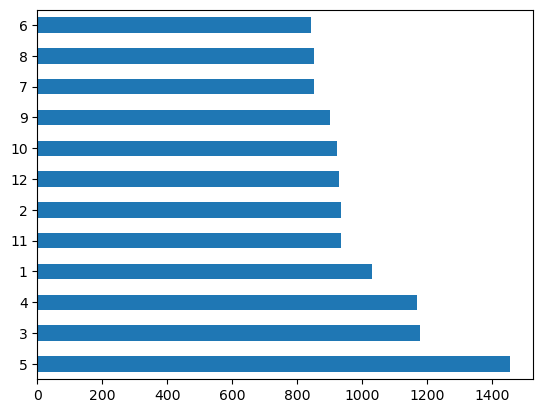

In [8]:
#extract day, month, year from datetime column 'creation_time'
users['month']= users['creation_time'].dt.month
users['year']= users['creation_time'].dt.year

#barplot to explore how many values for each month for creation time
print(users.month.value_counts())
users.month.value_counts().plot(kind='barh')

2013    5676
2014    3527
2012    2797
Name: year, dtype: int64


<AxesSubplot: >

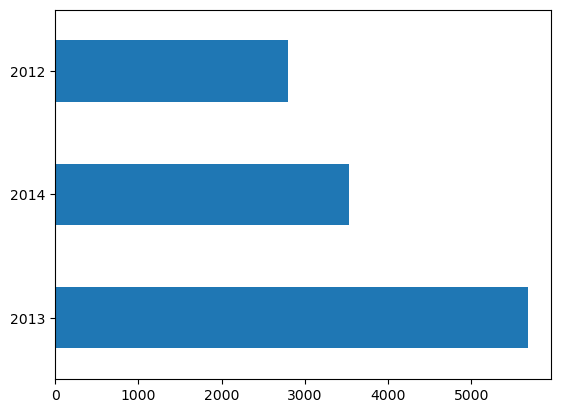

In [9]:
#barplot to explore how many values for each year for creation time
print(users.year.value_counts())
users.year.value_counts().plot(kind='barh')

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64


<AxesSubplot: >

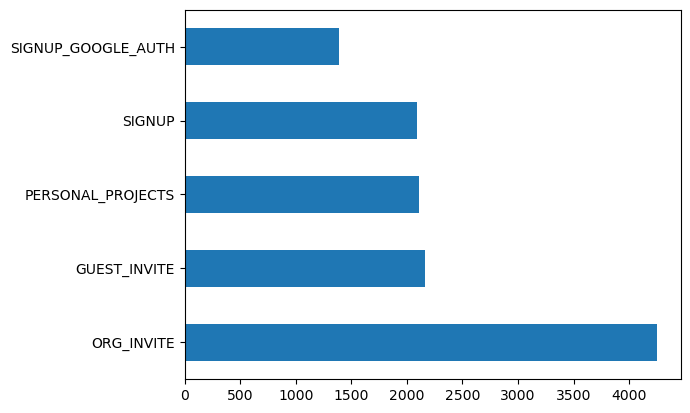

In [10]:
#barplot to explore how many values for each year for creation_source
print(users.creation_source.value_counts())
users.creation_source.value_counts().plot(kind='barh')

# Feature Engineering

In [11]:
#create new column by domain name from email
users['domain']=users['email'].str.split('@').str[1]
print(users.head())
print(users.domain.value_counts())

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2          

In [12]:
def convert_to_top_values(df, column_name):
    # Find the top 10 most frequent values in the specified column
    top_values = df[column_name].value_counts().nlargest(10).index.tolist()
    
    # Replace values not in the top 10 with 'other'
    df[column_name] = df[column_name].apply(lambda x: x if x in top_values else 'other')
    
    return df

In [13]:
#only keep the top 10 values for domain name and rest goes to 'other'
users1 = convert_to_top_values(users, 'domain')
print(users1.head())

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   
2          

In [14]:
#creating a function to find top 10 values and anything else becomes 0
def convert_to_top_values_numbers(df, column_name):
    # Find the top 10 most frequent values in the specified column
    top_values = df[column_name].value_counts().nlargest(10).index.tolist()
    
    # Replace values not in the top 10 with 0
    df[column_name] = df[column_name].apply(lambda x: x if x in top_values else 0)
    
    return df

In [15]:
users1 = convert_to_top_values_numbers(users1, 'org_id')
print(users1.head())

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0       0   
1                         0                           0       1   
2          

In [16]:
from datetime import timedelta

def mark_active(row, engage):
    user_id = row['object_id']
    #
    df_temp = engage.loc[engage['user_id'] == user_id].set_index('time_stamp').resample('D').count() #'D' for daily option
    active = any((df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7)) and sum(df_temp['user_id'][i:i+3]) >= 3 for i in range(len(df_temp) - 2))
    return int(active)

users1['active'] = users1.apply(mark_active, axis=1, engage=user_engagement)

print(users1)


       object_id       creation_time               name  \
0              1 2014-04-22 03:53:30     Clausen August   
1              2 2013-11-15 03:45:04      Poole Matthew   
2              3 2013-03-19 23:14:52  Bottrill Mitchell   
3              4 2013-05-21 08:09:28    Clausen Nicklas   
4              5 2013-01-17 10:14:20          Raw Grace   
...          ...                 ...                ...   
11995      11996 2013-09-06 06:14:15       Meier Sophia   
11996      11997 2013-01-10 18:28:37      Fisher Amelie   
11997      11998 2014-04-27 12:45:16        Haynes Jake   
11998      11999 2012-05-31 11:55:59       Faber Annett   
11999      12000 2014-01-26 08:57:12         Lima Thaís   

                            email     creation_source  \
0        AugustCClausen@yahoo.com        GUEST_INVITE   
1          MatthewPoole@gustr.com          ORG_INVITE   
2      MitchellBottrill@gustr.com          ORG_INVITE   
3       NicklasSClausen@yahoo.com        GUEST_INVITE   
4     

In [17]:
print(users1.active.value_counts())
print(1222/10778)

0    10778
1     1222
Name: active, dtype: int64
0.11337910558545185


In [18]:
users1['length_of_user'] = users1['last_session_creation_time'] - users1['creation_time']
print(users1.head())
users1.dtypes

   object_id       creation_time               name  \
0          1 2014-04-22 03:53:30     Clausen August   
1          2 2013-11-15 03:45:04      Poole Matthew   
2          3 2013-03-19 23:14:52  Bottrill Mitchell   
3          4 2013-05-21 08:09:28    Clausen Nicklas   
4          5 2013-01-17 10:14:20          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0       0   
1                         0                           0       1   
2          

object_id                               int64
creation_time                  datetime64[ns]
name                                   object
email                                  object
creation_source                        object
last_session_creation_time     datetime64[ns]
opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
org_id                                  int64
invited_by_user_id                    float64
month                                   int64
year                                    int64
domain                                 object
active                                  int64
length_of_user                timedelta64[ns]
dtype: object

In [19]:
users1['creation_source'] = users1.creation_source.astype('category')
users1['domain']= users1.domain.astype('category')
users1['org_id']= users1.org_id.astype('category')
users1['number_of_days'] = users1['length_of_user'].dt.days
print(users1.dtypes)
users1.columns

object_id                               int64
creation_time                  datetime64[ns]
name                                   object
email                                  object
creation_source                      category
last_session_creation_time     datetime64[ns]
opted_in_to_mailing_list                int64
enabled_for_marketing_drip              int64
org_id                               category
invited_by_user_id                    float64
month                                   int64
year                                    int64
domain                               category
active                                  int64
length_of_user                timedelta64[ns]
number_of_days                          int64
dtype: object


Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'month',
       'year', 'domain', 'active', 'length_of_user', 'number_of_days'],
      dtype='object')

In [20]:
users = users1[['org_id', 'creation_source', 'domain', 'opted_in_to_mailing_list', 
                'enabled_for_marketing_drip', 'month', 'year', 'number_of_days', 'active']]

In [21]:
users.dtypes

org_id                        category
creation_source               category
domain                        category
opted_in_to_mailing_list         int64
enabled_for_marketing_drip       int64
month                            int64
year                             int64
number_of_days                   int64
active                           int64
dtype: object

In [22]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
users['org_id']= label_encoder.fit_transform(users['org_id']) 
users['creation_source']= label_encoder.fit_transform(users['creation_source']) 
users['domain']= label_encoder.fit_transform(users['domain'])

/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_18448/3986769641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['org_id']= label_encoder.fit_transform(users['org_id'])
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_18448/3986769641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users['creation_source']= label_encoder.fit_transform(users['creation_source'])
/var/folders/5n/xfdq9pv147x25d8d7_s4c24c0000gn/T/ipykernel_18448/3986769641.py:6: SettingWithCopyWarning: 
A value

# Prepare data for train- test-split

In [23]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import xgboost as xgb
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier 

In [24]:
#create X, y to be used in the train-test-split arguments
X= users.drop('active', axis=1)
y= users['active']

In [25]:
#undersample the zeros in data
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

0    1222
1    1222
Name: active, dtype: int64


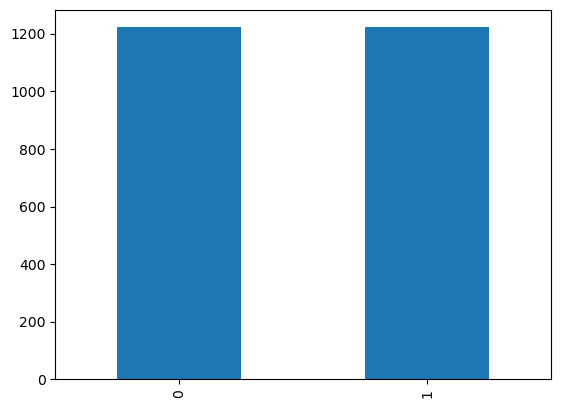

In [26]:
#graphing y value counts to make sure even amount of WnvPresent and not
y_resampled.value_counts().plot(kind='bar')
print(y_resampled.value_counts())

In [27]:
#split the data to prepare it for modeling
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=47)

In [28]:
print(X_train_under.dtypes)
y_train_under.dtypes

org_id                        int64
creation_source               int64
domain                        int64
opted_in_to_mailing_list      int64
enabled_for_marketing_drip    int64
month                         int64
year                          int64
number_of_days                int64
dtype: object


dtype('int64')

# Modeling

In [29]:
#creating classification metric measures
def display_confusion_matrix(ytest, ypred, model) :
    cm = confusion_matrix(ytest, ypred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
def class_report(ytest, ypred) :
    print(classification_report(ytest, ypred))
    
def feature_importance(model) :
    xgb.plot_importance(model)
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.show()

### Model 1

In [30]:
#setting the base model for XGBoost for undersampling base model
model_1 = xgb.XGBClassifier()
model_1.fit(X_train_under, y_train_under)

#use model to predict y values on X_test set
y_pred_under = model_1.predict(X_test_under)

Model 2 ROC AUC score: 0.9687


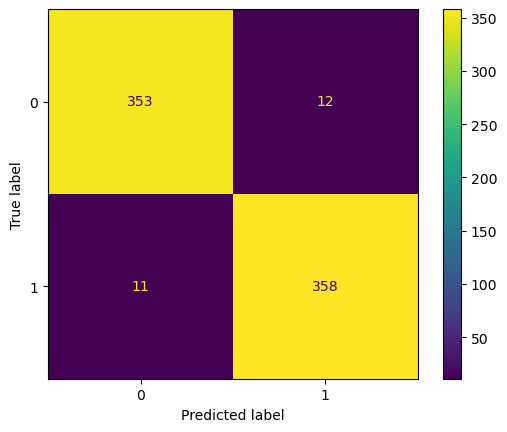

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       365
           1       0.97      0.97      0.97       369

    accuracy                           0.97       734
   macro avg       0.97      0.97      0.97       734
weighted avg       0.97      0.97      0.97       734



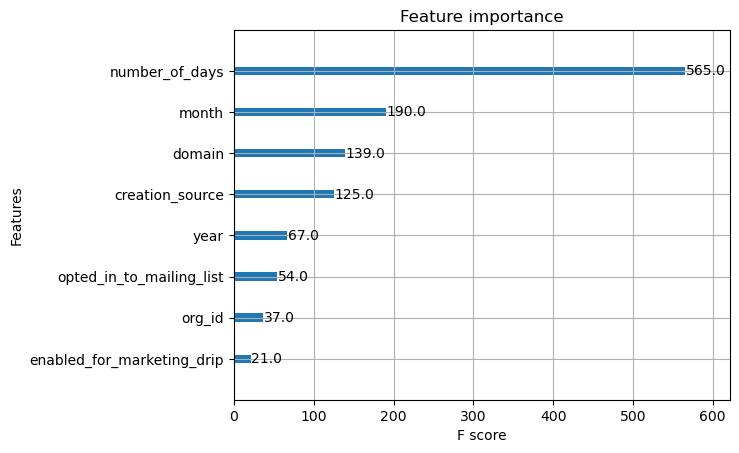

In [32]:
#determine accuracy of model using actual y_test values and predicted y_pred values
print('Model 2 ROC AUC score: {0:0.4f}'. format(roc_auc_score(y_test_under, y_pred_under)))

#display confustion matrix for base model of XGBoost
display_confusion_matrix(y_test_under, y_pred_under, model_1)

#classification report
class_report(y_test_under, y_pred_under)

#feature importance
feature_importance(model_1)

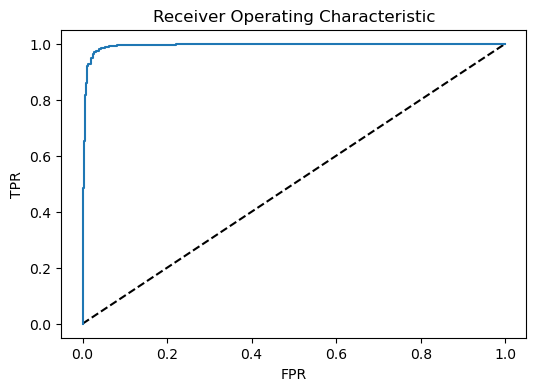

In [33]:
#graph ROC for XGBoost undersampling base model
y_pred_prob1_under = model_1.predict_proba(X_test_under)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_under, y_pred_prob1_under)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Model 2")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

In [ ]:
Model 2 Using Grid Search

In [34]:
#set estimator
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [35]:
#set parameters 
parameters = {
    'max_depth': range (2, 10, 2),
    'n_estimators': range(120, 220, 40),
    'learning_rate': [0.2, 0.4, 0.6],  
    'min_child_weight' : range(2, 7, 1),
    'colsample_bytree': [0.2, 0.5]
}


In [36]:
#grid search with the different parameters listed above 5 cross validations
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

In [38]:
#fit the grid search on the X_train and y_train data 
grid_search.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=10,
             param_grid={'colsample_bytree': [0.2, 0.5],
                         'learning_rate': [0.2, 0.4, 0.6],
                         'max_depth': range(2, 10, 2),
                         'min_child_weight': range(2, 7),
                         'n_estimators': range(120, 220, 40)},
             scoring='roc_auc', verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)
Model 2 ROC AUC score: 0.9741


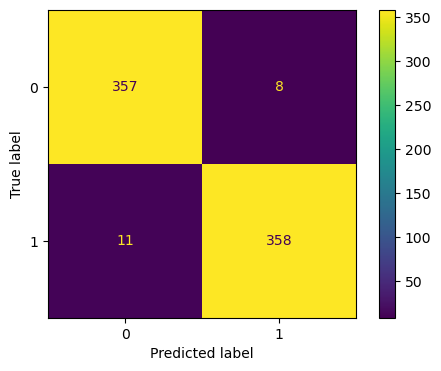

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       365
           1       0.98      0.97      0.97       369

    accuracy                           0.97       734
   macro avg       0.97      0.97      0.97       734
weighted avg       0.97      0.97      0.97       734



In [43]:
#predict y values from X_test set
y_pred = grid_search.predict(X_test_under)

#print the best parameters from the grid search
print(grid_search.best_estimator_)

#determine accuracy of model using actual y_test values and predicted y_pred values
print('Model 2 ROC AUC score: {0:0.4f}'. format(roc_auc_score(y_test_under, y_pred)))

#display confustion matrix for base model of XGBoost
display_confusion_matrix(y_test_under, y_pred, grid_search)

#classification report
class_report(y_test_under, y_pred)


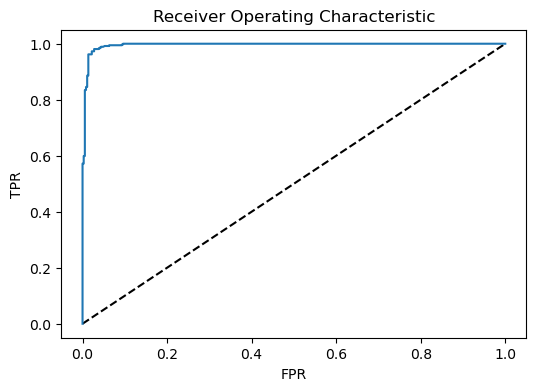

In [49]:
#ROC curve for XGBoost 
y_pred_prob1 = grid_search.predict_proba(X_test_under)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test_under, y_pred_prob1)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Model 2")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')


plt.savefig("relax_challenge/ROC_curve.png")

In [44]:
#taking best parameters from grid search and applying to XGBClassifier for feature importance

model_best = xgb.XGBClassifier(colsample_bytree=0.2, learning_rate=0.6, max_depth=2, n_estimators=120)
model_best.fit(X_train_under, y_train_under)

#use model to predict y values on X_test set
y_pred_under = model_1.predict(X_test_under)

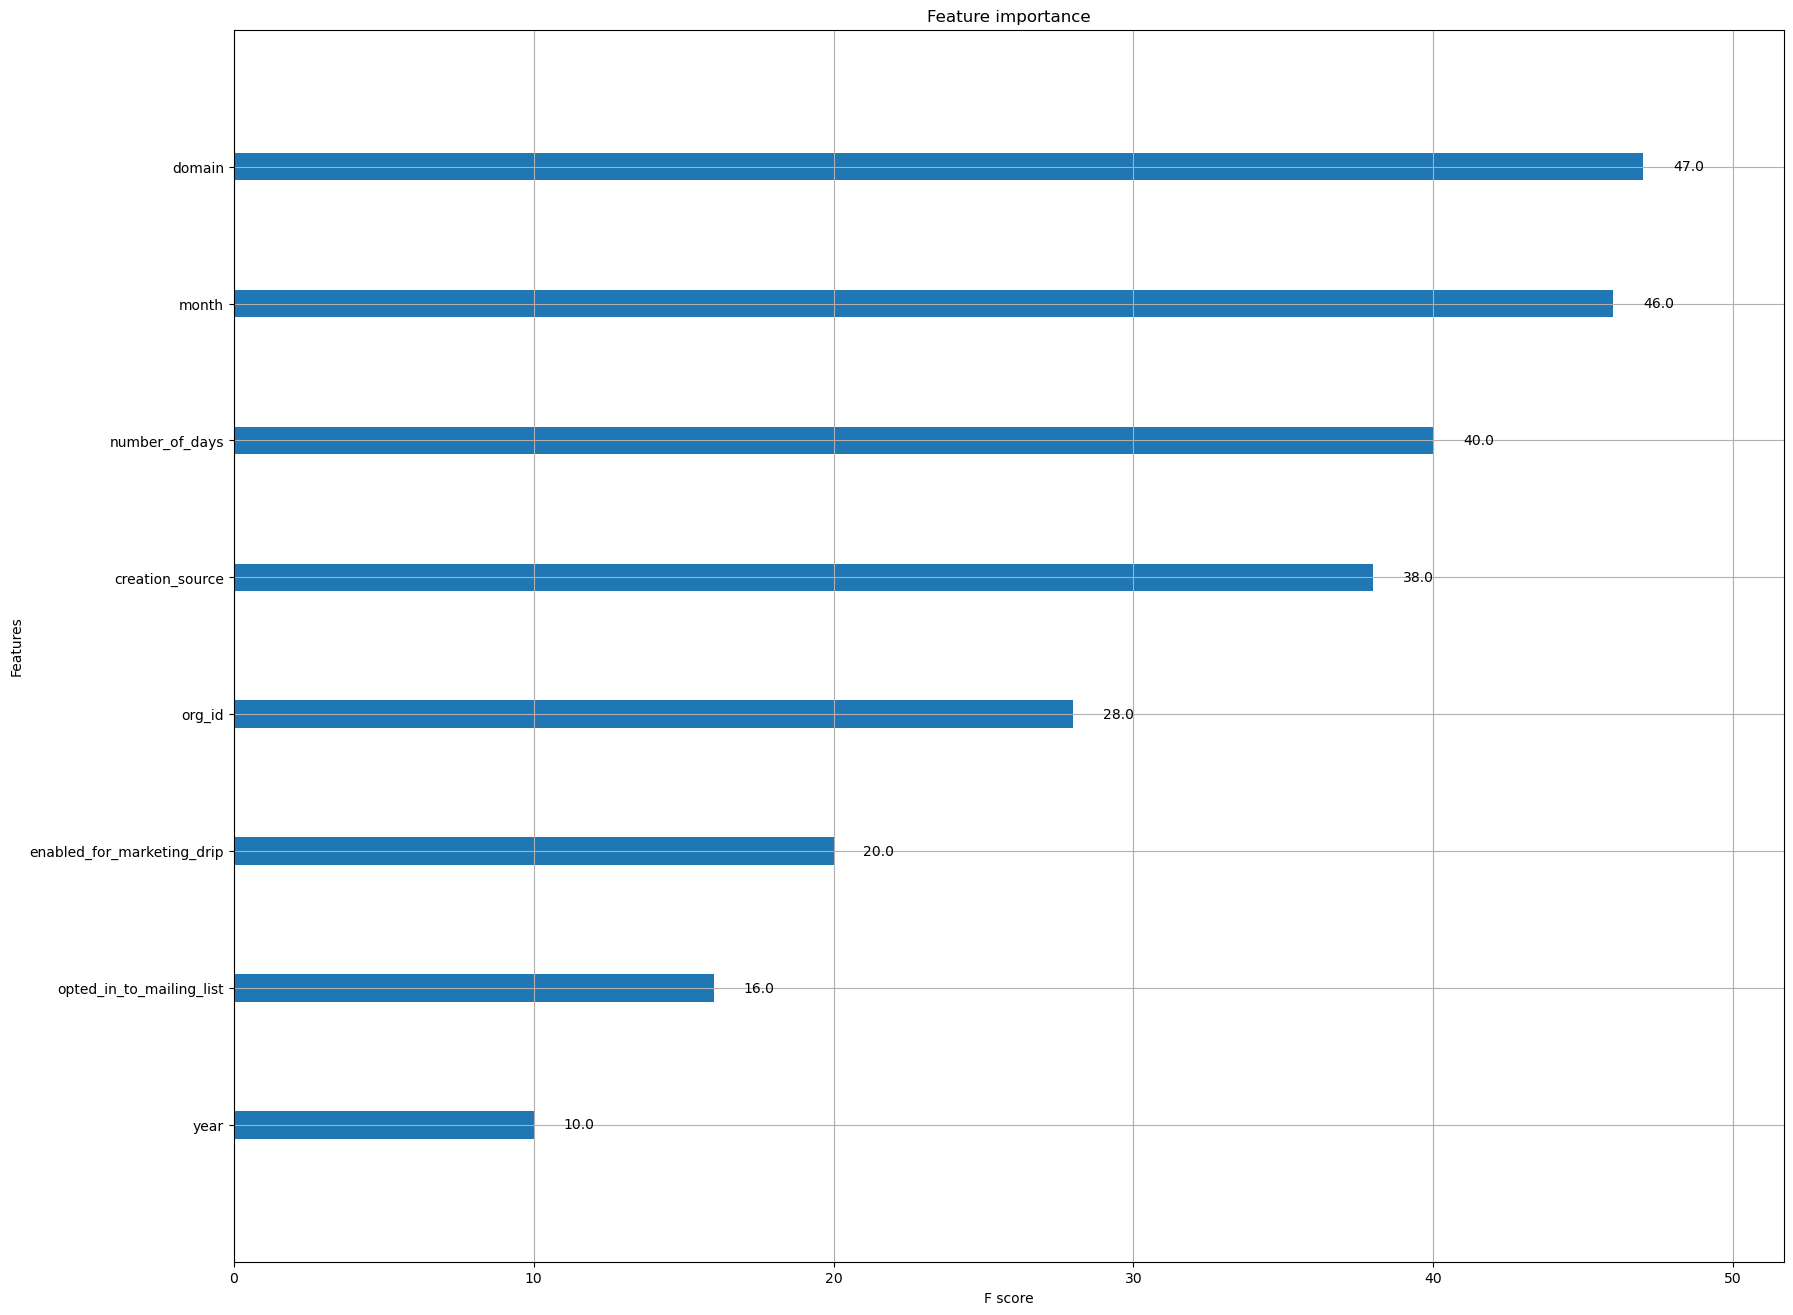

In [55]:
#feature importance
xgb.plot_importance(model_best)
plt.rcParams['figure.figsize'] = [24, 16]
 
plt.savefig("relax_challenge/feature_importance.png")